In [1]:
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [2]:
DB_PATH = os.path.join('/Users', 'ck-intosh','Downloads', 'COMP_DL', 'Proj_2', 'test')
LABEL_PATH = os.path.join('/Users', 'ck-intosh', 'Downloads', 'COMP_DL', 'Proj_2', 'labels.csv')

In [3]:
labels_df = pd.read_csv(LABEL_PATH, index_col=0)
labels = sorted(list(set(labels_df.breed)))

labels_map = {labels[i]:i for i in range(len(labels))}
labels_map_rev = {i:labels[i] for i in range(len(labels))}
print(labels_map)

NUM_CLASS = len(labels)

class_to_num = dict(zip(labels, range(NUM_CLASS)))

IMG_SIZE = 128
NUM_CHANNELS = 3

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

In [4]:
def get_abs_img_path(img, dir):
  return os.path.join(DB_PATH, dir, img)

IMG_PATHS = []

ims = os.listdir(DB_PATH)
ims = [x for x in ims if x[0] != '.']

IMG_PATHS += list(map(get_abs_img_path, ims, [DB_PATH] * len(ims)))

print(f"\n+ {'Total Img':<10}:", len(IMG_PATHS))


+ Total Img : 10357


In [5]:
def load_dataset(img_list):
    x_data, y_data = [], []
    for img_path in img_list:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        x_data.append(np.array(img).astype("float32"))
        img_name = img_path.split(os.path.sep)[-1].split('.')[0]
        y_data.append(img_name)
    x_data = np.array(x_data)
    x_data, y_data = shuffle(x_data, y_data)
    return x_data, y_data

In [6]:
x_test, x_ids = load_dataset(IMG_PATHS)
print("Test : IMG", x_test.shape)
print("Test : ID ", len(x_ids))

Test : IMG (10357, 128, 128, 3)
Test : ID  10357


In [7]:
## Max validations
models_dir = os.listdir(os.path.join(os.getcwd(), 'd-1024-do-4','history'))
models_dir = os.listdir(os.path.join(os.getcwd(), 'history'))
models_dir = [x for x in models_dir if x[-1] not in ['t', 's']]
df = [pd.read_csv(os.path.join(os.getcwd(),'history', x), index_col=0) for x in models_dir]
max_val = [x[x[' validation_accuracy'] == x[' validation_accuracy'].max()] for x in df]
[print(max_val[i], models_dir[i]) for i in range(len(models_dir))]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/d-1024-do-4/history'

In [ ]:
## Max validations
models_dir = os.listdir(os.path.join(os.getcwd(), 'd-1024-d0-4-512-d0-2','history'))
models_dir = [x for x in models_dir if x[-1] not in ['t', 's']]
df = [pd.read_csv(os.path.join(os.getcwd(), 'd-1024-d0-4-512-d0-2','history', x), index_col=0) for x in models_dir]
max_val = [x[x[' validation_accuracy'] == x[' validation_accuracy'].max()] for x in df]
[print(max_val[i], models_dir[i]) for i in range(len(models_dir))]

In [8]:
m_paths_best = [os.path.join(os.getcwd(), '512', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '512_512', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '512_1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '1024_512', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '1024_1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '1024_2096', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST'),
          os.path.join(os.getcwd(), '2096_1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST')
          ]

res_paths_best = [os.path.join(os.getcwd(), 'submission', '512.csv'),
          os.path.join(os.getcwd(), 'submission','512_512.csv'),
          os.path.join(os.getcwd(), 'submission','512_1024.csv'),
          os.path.join(os.getcwd(), 'submission','1024.csv'),
          os.path.join(os.getcwd(), 'submission','1024_512.csv'),
          os.path.join(os.getcwd(), 'submission','1024_1024.csv'),
          os.path.join(os.getcwd(), 'submission','1024_2096.csv'),
          os.path.join(os.getcwd(), 'submission','2096_1024.csv')
          ]

In [9]:
for i,model_p in enumerate(m_paths_best):
    model = tf.keras.models.load_model(model_p)
    pred = model.predict(x_test)
    res_df = pd.DataFrame(columns=["id"] + list(labels))
    res_df.id = x_ids
    res_df.loc[:,list(labels)]= pred
    res_df.to_csv(res_paths_best[i],index=None)

Metal device set to: Apple M1 Pro


2023-04-10 00:14:17.762846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-10 00:14:17.762954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-04-10 00:14:39.902647: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-04-10 00:14:40.304694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/_b/x6dm1_4j36g1cbgmkthrttgm0000gn/T/ipykernel_58320/3676228067.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setti

In [10]:
m_paths_400 = [os.path.join(os.getcwd(), '512', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '512_512', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '512_1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '1024_512', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '1024_1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '1024_2096', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400'),
          os.path.join(os.getcwd(), '2096_1024', 'model', 'EfficientNetB0', 'model_EfficientNetB0_400')
          ]

res_paths_400 = [os.path.join(os.getcwd(), 'submission-400', '512.csv'),
          os.path.join(os.getcwd(), 'submission-400','512_512.csv'),
          os.path.join(os.getcwd(), 'submission-400','512_1024.csv'),
          os.path.join(os.getcwd(), 'submission-400','1024.csv'),
          os.path.join(os.getcwd(), 'submission-400','1024_512.csv'),
          os.path.join(os.getcwd(), 'submission-400','1024_1024.csv'),
          os.path.join(os.getcwd(), 'submission-400','1024_2096.csv'),
          os.path.join(os.getcwd(), 'submission-400','2096_1024.csv')
          ]

In [11]:
for i,model_p in enumerate(m_paths_400):
    model = tf.keras.models.load_model(model_p)
    pred = model.predict(x_test)
    res_df = pd.DataFrame(columns=["id"] + list(labels))
    res_df.id = x_ids
    res_df.loc[:,list(labels)]= pred
    res_df.to_csv(res_paths_400[i],index=None)

2023-04-10 00:22:58.479880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/_b/x6dm1_4j36g1cbgmkthrttgm0000gn/T/ipykernel_58320/3512788045.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  res_df.loc[:,list(labels)]= pred
2023-04-10 00:23:44.862665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
/var/folders/_b/x6dm1_4j36g1cbgmkthrttgm0000gn/T/ipykernel_58320/3512788045.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if

In [40]:
models_path = os.path.join(os.getcwd(), 'model', 'EfficientNetB0', 'model_EfficientNetB0_BEST')
model = tf.keras.models.load_model(models_path)

OSError: No file or directory found at /Users/ck-intosh/Downloads/COMP_DL/Proj_2/Models-work/model/EfficientNetB0/model_EfficientNetB0_BEST

In [41]:
pred = model.predict(x_test)

KeyboardInterrupt: 

Image Shape :  ea5a2c10729ab1ffec74c0aabce02b52

[4.21012403e-04 1.89463626e-05 1.98618955e-06 3.16957085e-05
 1.22452957e-05 3.63403956e-06 5.01867071e-05 2.29844245e-05
 7.70791608e-09 1.10682796e-08 2.11493081e-08 9.61846763e-06
 1.76007816e-07 1.13487140e-07 3.46392113e-07 1.96299993e-07
 1.55293412e-04 2.35455445e-06 3.94215675e-07 1.68849601e-05
 1.27397617e-03 6.52742438e-06 1.37987308e-06 3.81775957e-04
 1.19048785e-07 4.46702797e-05 1.44215871e-03 1.89679937e-04
 7.29477222e-07 2.59794592e-06 4.16135570e-08 5.54751125e-07
 7.87660338e-06 1.87441219e-05 4.88537298e-05 2.65506998e-07
 7.56153185e-08 3.78979094e-05 2.14916563e-05 8.70897754e-09
 1.59855333e-07 7.97920711e-06 2.07702996e-07 1.44828221e-06
 8.49452335e-05 1.64549288e-04 5.87968752e-05 1.74914896e-06
 5.68079855e-03 1.91002400e-07 1.42163926e-05 7.99148766e-05
 1.05066398e-07 2.29469811e-06 3.44140106e-03 3.17687432e-06
 1.54256256e-07 5.00695787e-05 5.58978718e-06 3.19574901e-05
 2.91810750e-07 2.54169663e-07 5.306

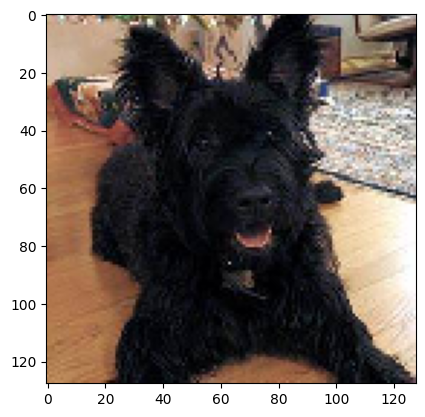

In [35]:
check = 0
print("Image Shape : ", x_ids[check])
plt.imshow(x_test[check]/255.0)
print()
# First prediction
print(pred[check])
print(f"Max value (probability of prediction): {np.max(pred[check])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[check])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[check])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {labels[np.argmax(pred[check])]}")

In [36]:
res_df = pd.DataFrame(columns=["id"] + list(labels))
res_df.id = x_ids
res_df.head(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea5a2c10729ab1ffec74c0aabce02b52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8e3e85e7d95ad085aaf3c945799d53e0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d354419a80463739ce343ad80c3a906b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f191370aae3cc8e282cfd72ecdcc2226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9468f91a9e5600e4d272bcda5bcab3cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,e4d878f113883a3caab47d3126d2c2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,d567f2d9f1a8209b0c44bf8f2546491c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,65bd007dd322ac49c62bb86195e529ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,61f1308e0a0e6d434b28f6077daf1292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3a1e155ab7f600da63fe9a2591d46e5a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
res_df.loc[:,list(labels)]= pred

res_df.to_csv('submission.csv',index=None)
res_df.head()

/var/folders/_b/x6dm1_4j36g1cbgmkthrttgm0000gn/T/ipykernel_8942/2155770037.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  res_df.loc[:,list(labels)]= pred


,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ea5a2c10729ab1ffec74c0aabce02b52,4.210124e-04,1.894636e-05,0.000002,3.169571e-05,1.224530e-05,3.634040e-06,5.018671e-05,2.298442e-05,7.707916e-09,...,1.536676e-07,5.038212e-05,5.395929e-06,1.391362e-08,1.358462e-06,3.684985e-08,1.308624e-03,8.473551e-07,1.420469e-04,8.053644e-05
1,8e3e85e7d95ad085aaf3c945799d53e0,2.082957e-05,1.014058e-06,0.000003,9.627438e-08,7.814979e-09,3.963424e-07,4.482372e-07,2.688407e-10,6.138188e-06,...,7.236255e-05,5.469155e-05,5.797280e-07,1.323501e-06,1.338536e-06,2.962644e-05,1.915456e-06,4.522594e-08,1.696217e-06,7.298716e-04
2,d354419a80463739ce343ad80c3a906b,8.304788e-07,2.323572e-09,0.000295,3.662459e-06,1.224388e-04,3.419475e-05,6.771655e-04,1.162991e-03,5.239505e-06,...,4.260888e-05,2.054378e-01,4.064603e-04,4.092643e-06,1.802823e-04,2.054791e-05,2.332113e-05,1.464134e-03,1.886804e-05,7.637062e-03
3,f191370aae3cc8e282cfd72ecdcc2226,2.663124e-07,4.528769e-08,0.000009,2.203213e-08,4.246354e-10,1.479513e-10,7.917095e-09,2.647501e-10,1.747038e-12,...,5.303104e-09,1.423055e-08,4.600189e-09,3.162630e-10,9.388347e-08,3.898789e-08,2.513630e-08,2.892215e-05,2.280393e-07,2.574835e-08
4,9468f91a9e5600e4d272bcda5bcab3cd,1.444242e-06,7.082516e-09,0.000035,1.772985e-07,5.523160e-05,8.684453e-05,3.425002e-04,1.288300e-03,9.225792e-07,...,1.038918e-05,1.314395e-03,4.581160e-06,1.932604e-08,2.036626e-07,1.112000e-06,2.117907e-05,8.747596e-06,4.466403e-08,4.322430e-05


In [38]:
len(res_df)

10357